In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
* 히스토그램 : df.plot(kind='hist')
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

In [2]:
df = pd.read_csv('dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [9]:
df['NDate'] = pd.to_datetime(df.Date)
df1 = df.set_index('NDate')
df1.drop(['Date','Volume'],axis=1,inplace=True)
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='NDate'>

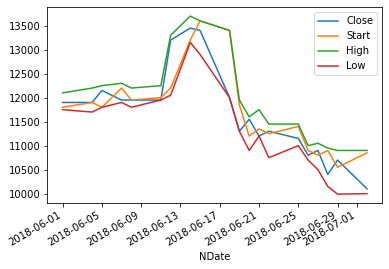

In [10]:
#선그래프 : df.plot()의 default
df1.plot() #default = 선그래프

In [5]:
df1.corr()

,Close,Start,High,Low
Close,1.000000,0.856181,0.941201,0.946297
Start,0.856181,1.000000,0.961009,0.921467
High,0.941201,0.961009,1.000000,0.945487
Low,0.946297,0.921467,0.945487,1.000000


<AxesSubplot:>

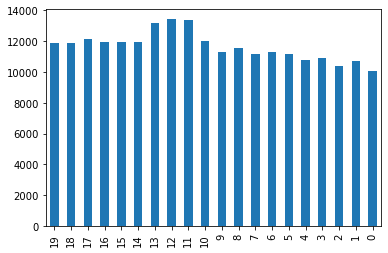

In [15]:
#막대그래프
df.Close[::-1].plot(kind = 'bar')

<AxesSubplot:xlabel='NDate'>

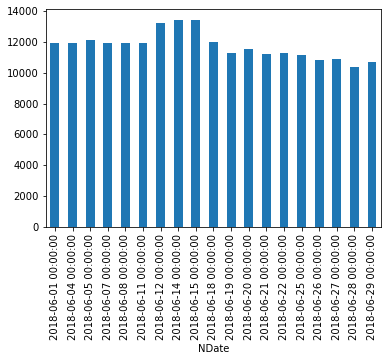

In [15]:
#6월만을 추출하여 Close컴럼으로 일별 막대그래프를 그리시오.
# df1.loc['2018-06'][::-1].plot(kind='bar')
df1.Close.loc['2018-06'][::-1].plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

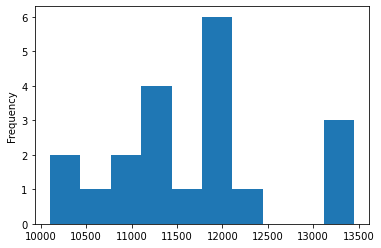

In [17]:
df1.Close.plot(kind='hist', bins=10)

<AxesSubplot:xlabel='Close', ylabel='Volume'>

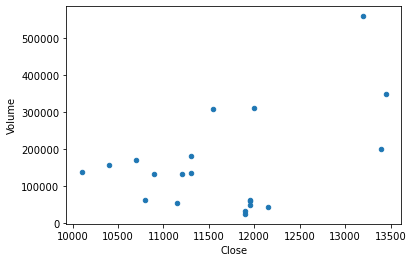

In [18]:
#산점도
df.plot(x = 'Close', y='Volume', kind='scatter')

# ------------0707--------------

### Box plot 
<의미해석>
* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값

<AxesSubplot:>

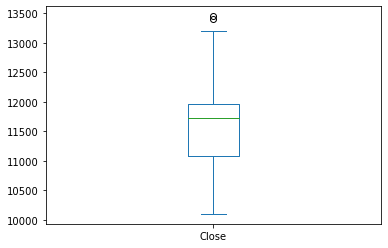

In [19]:
#box plot #사분위수
df1.Close.plot(kind = 'box')

In [20]:
# 이상치 확인
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

In [21]:
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1

#이상치
abv = df[(df.Close <= (Q1- 1.5*IQR))|(df.Close >= (Q3+ 1.5*IQR))]
abv

,Date,Close,Start,High,Low,Volume,NDate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15
12,2018-06-14,13450,13200,13700,13150,347451,2018-06-14


# seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

In [151]:
#사용가능한 스타일 목록
#darkgrid, whitegrid, dark, white, ticks
sns.set_style('darkgrid')
sns.set_style('whitegrid')

## box plot

In [153]:
#물고기 종류 따른 길이 dataset
fish_multi = pd.read_csv('dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='species', ylabel='length'>

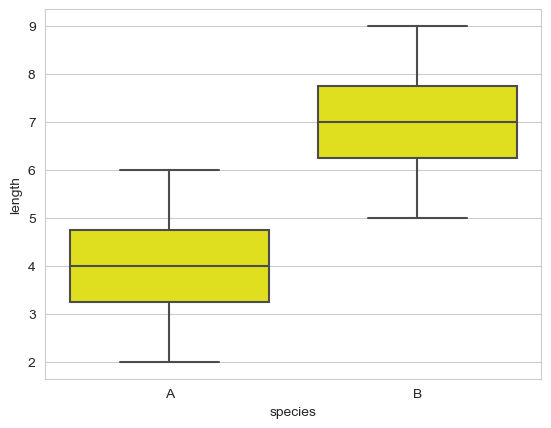

In [154]:
import seaborn as sns
sns.boxplot(x= 'species', y='length', data=fish_multi, color = 'yellow')

In [31]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

## violin plot

<AxesSubplot:xlabel='species', ylabel='length'>

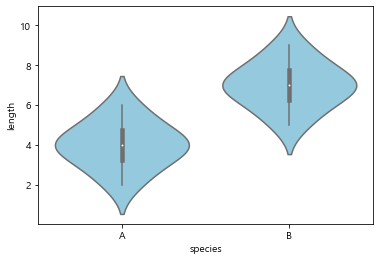

In [107]:
#box대신 histogram을 세로로 세워서 배치한 상자그림
#어느부분에 데이터가 집중되어있는지 정보 추가
sns.violinplot(x='species',y='length', data=fish_multi, color = 'skyblue')

In [110]:
#violin plot도 이상치를 발견하나용 ? 적절한데이터로 test해보세요~

## jointplot

In [115]:
cov_data = pd.read_csv('dataset/4_cov.csv')
cov_data.head()

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45


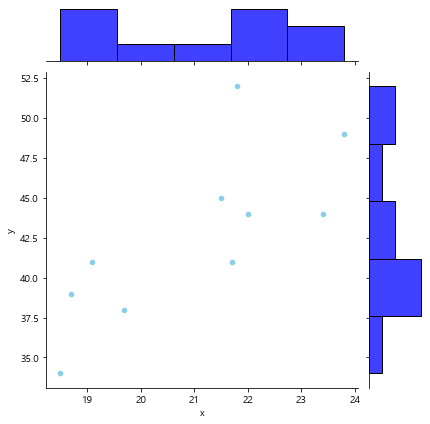

In [117]:
#histogram과 scattor plot을 joint
#x,y 각각의 분포와 x와 y의 분포를 동시에
sns.jointplot(cov_data.x, cov_data.y,
             joint_kws = {'color':'skyblue'},
              marginal_kws = {'color':'blue'}) #kws= keywords

## lmplot, regplot

In [118]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


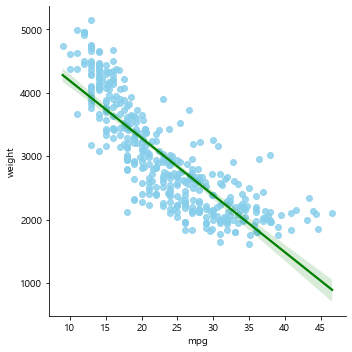

In [121]:
#lmplot
sns.lmplot(x='mpg', y='weight', data=df_auto,
           scatter_kws = {'color':'skyblue'},
           line_kws = {'color':'green'})

<AxesSubplot:xlabel='mpg', ylabel='weight'>

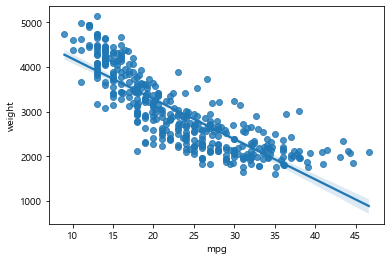

In [122]:
#regplot
sns.regplot(x='mpg', y='weight', data=df_auto, fit_reg=True) #fit_reg : 회귀선 추정유무

<AxesSubplot:ylabel='Frequency'>

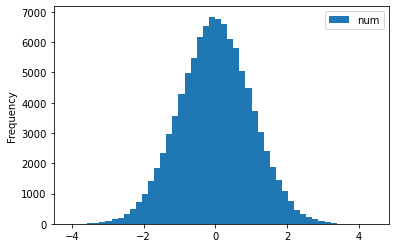

In [34]:
#평균 0, 표준편차1 인 정규분포 난수 10000개로 df생성
df = np.random.randn(100000)
df= pd.DataFrame(df, columns = ['num'])
df.describe()

df.plot(kind='hist', bins =50)

<AxesSubplot:ylabel='Frequency'>

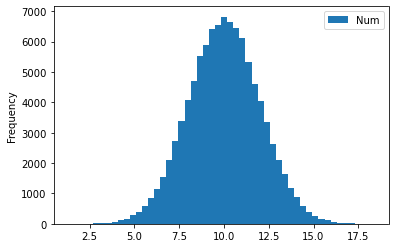

In [35]:
# 평균 10, 표준편자 2, 샘플 10000개를 추출하여, histogram그리기
from scipy import stats

np.random.seed(1)
sample1 = stats.norm.rvs(loc=10, scale=2, size=100000) #array 형태
df1 = pd.DataFrame(sample1, columns=['Num'])
df1.head()

df1.plot(kind='hist', bins=50)

## barplot

In [90]:
tips = pd.read_csv('dataset/tips.csv')
display(tips.head())

party_counts = pd.crosstab(tips['day'], tips['size']) #crosstab # table size
display(party_counts.head())

#size 1,6을 제외하고, normalizing to sum to 1 (합계를 1로)
party_counts = party_counts.loc[:,2:5] #iloc아니고 loc이므로 col name으로 가져옴
party_pcts= party_counts.div(party_counts.sum(1), axis=0)
party_pcts

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [95]:
tips['tip_pct'] = tips['tip']/ (tips['total_bill'] - tips['tip']) #markup <> margin(tip/totalbill)
display(tips.head())

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


- 그래프 그리기 (sns)

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

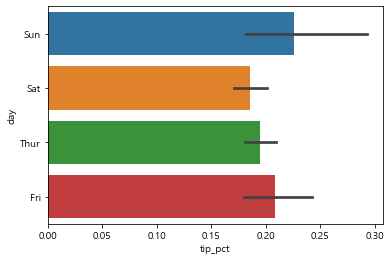

In [96]:
sns.barplot(x='tip_pct', y='day', data = tips, orient='h') #horizon
#검은 선은 신뢰구간을 나타냄

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

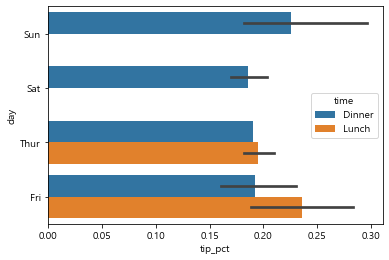

In [97]:
#dinner, lunch별로 #hue
sns.barplot(x='tip_pct', y='day',hue='time', data = tips, orient='h')

## countplot

<AxesSubplot:xlabel='size', ylabel='count'>

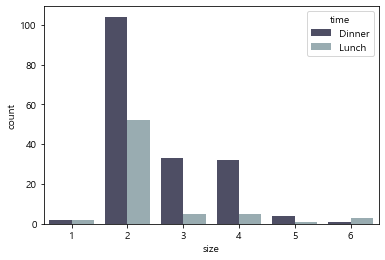

In [98]:
sns.countplot('size',hue = 'time', data=tips, palette='bone') #palette : 디자인

## distplot
- histogram + 밀도함수plot

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='length', ylabel='Density'>

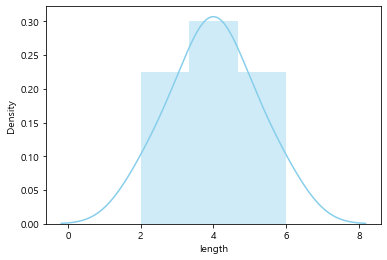

In [103]:
#fish 종류별 몸길이 데이터 추출
fish_multi = pd.read_csv('dataset/4_fm2.csv')
display(fish_multi.head())
length_a = fish_multi.query("species =='A'")['length'] #query = boolean indexing
length_b = fish_multi.query("species =='B'")['length']

sns.distplot(length_a, color='skyblue')

<AxesSubplot:xlabel='length'>

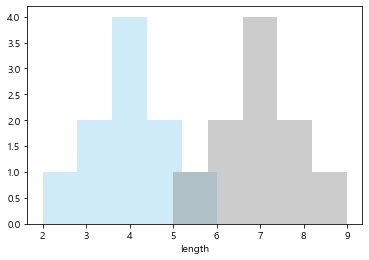

In [104]:
sns.distplot(length_a, bins=5, color='skyblue', kde=False) #밀도함수 없애기 #kde : kernerdensity estimation
sns.distplot(length_b, bins=5, color = 'gray', kde=False)

## pairplot
- 수많은 plot을 모두 보여줌

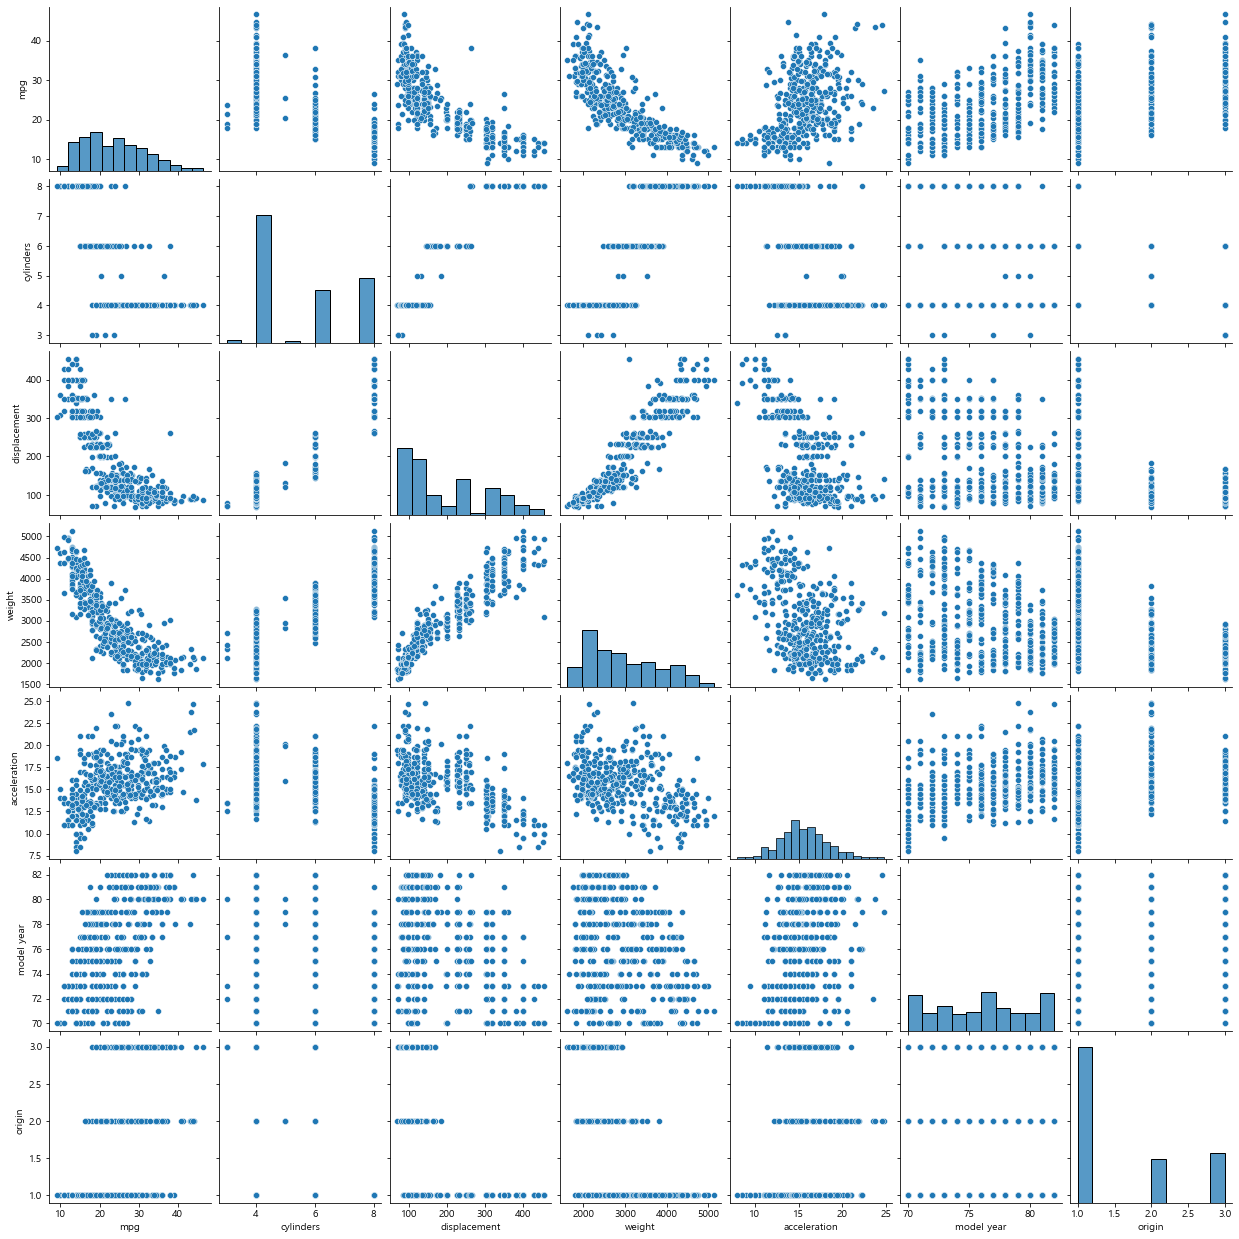

In [123]:
sns.pairplot(df_auto, palette='gray')

## heatmap

Text(0.5, 1.0, 'Heatmap of the Dataset')

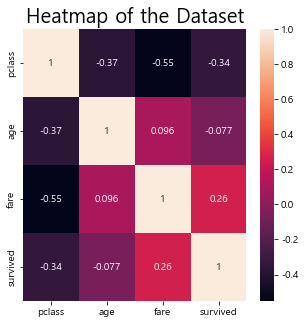

In [127]:
#plt와 sns같이 쓸 수 있음
t_df = sns.load_dataset('titanic')
plt.figure(figsize=(5,5))

sns.heatmap(t_df[['pclass','age','fare','survived']].corr(), annot=True) #annotation(주석)
plt.title('Heatmap of the Dataset', fontsize =20)

In [129]:
table = t_df.pivot_table(index = ['sex'], columns=['class'], values = ['survived'], aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

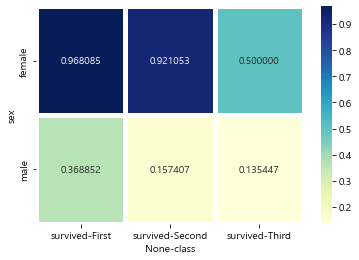

In [133]:
sns.heatmap(table,
            annot=True, fmt='f',
            cmap='YlGnBu',
           linewidth =5,
           cbar = True) # linewigth = 사이간격 / cmap = design

# matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y): 

In [136]:
#사용가능한 스타일 종류
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [139]:
#스타일 선택 및 사용
plt.style.use('ggplot') #사용 선언후, 이후의 plot들에 모두 적용됨.
plt.style.use('default')

## line graph : plt.plot()

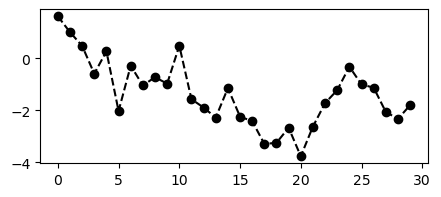

In [145]:
import matplotlib.pyplot as plt
from numpy.random import randn
plt.figure(figsize=(5,2))

np.random.seed(1)
plt.plot(randn(30).cumsum(), linestyle = 'dashed', color='k',marker='o' )

In [37]:
data = np.random.randn(1000)
print(data[:10])
cdata = data.cumsum()
cdata[:10]

[-0.69166075 -0.39675353 -0.6871727  -0.84520564 -0.67124613 -0.0126646
 -1.11731035  0.2344157   1.65980218  0.74204416]


array([-0.69166075, -1.08841428, -1.77558698, -2.62079262, -3.29203875,
       -3.30470335, -4.4220137 , -4.187598  , -2.52779582, -1.78575166])

Text(0.5, 0, 'stage')

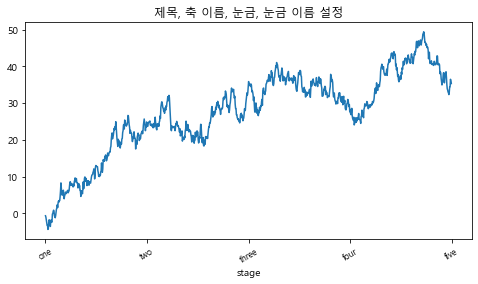

In [38]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
font_path = 'dataset/malgun.ttf'
font_name = font_manager.FontProperties(fname= font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False #minus부호 출력

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1) #축 #1행, 1열 중 하나
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000]) #바닥 축 값 설정
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation = 30, fontsize ='small') #바닥 축 이름 지정, 걱도, 사이즈 지정

#제목, 축 이름, 눈금, 눈금 이름 설정
ax.set_title('제목, 축 이름, 눈금, 눈금 이름 설정') #plt에서는 한글이 깨져나옴
ax.set_xlabel('stage') #바닥 레이블

- 한 그래프에 여러 data 표기

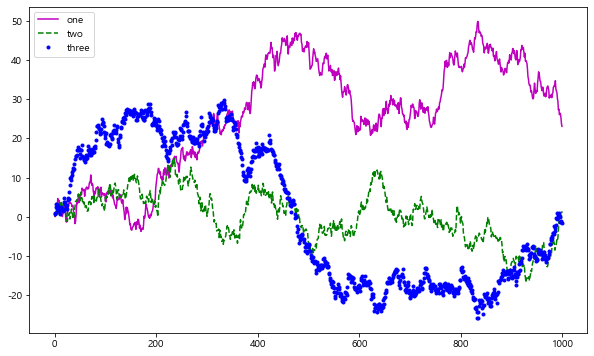

In [39]:
fig = plt.figure(figsize =(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'m', label='one') #마젠타 color
ax.plot(randn(1000).cumsum(),'g--', label ='two') #green + 모양
ax.plot(randn(1000).cumsum(),'b.', label='three')

#범례
plt.legend(loc='best') #알아서 제일 best location

In [40]:
%pwd

'C:\\cakd7\\m2_분석라이브러리활용\\visualization'

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

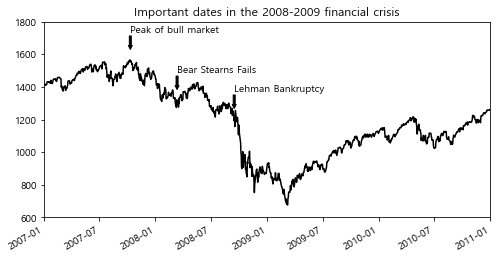

In [41]:
# 주석과 글자는 text, arrow, annotate 함수를 이용하여 추가
from datetime import datetime

fig = plt.figure(figsize =(8,4))
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('./dataset/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')


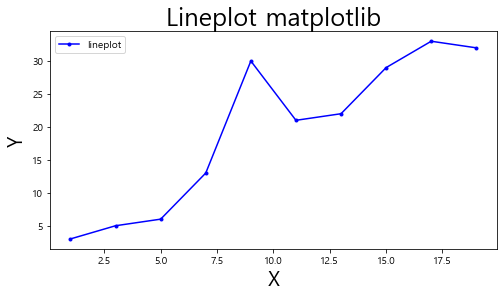

In [42]:
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

plt.figure(figsize=(8,4)) #size
plt.plot(x,y,color ='blue', marker='o', markersize=3)
plt.title('Lineplot matplotlib', size=25) #제목
plt.xlabel('X', size = 20)
plt.ylabel('Y', size = 20)
plt.legend(labels = ['lineplot'])

Text(0, 0.5, 'Y')

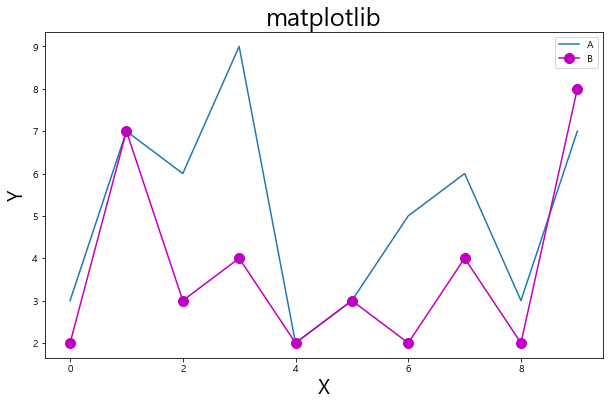

In [43]:
np.random.seed(10)
x = np.arange(10)
y1 = np.random.randint(2,10,size=10)
y2 = np.random.randint(2,10,size=10)
plt.figure(figsize=(10,6))

#그리기
plt.plot(x,y1)
plt.plot(x,y2, color = 'm', marker='o', markersize=10)
plt.title('matplotlib', size=25) #제목
plt.legend(labels = ['A','B'])

plt.xlabel('X', size = 20)
plt.ylabel('Y', size = 20)


## bar plot 

- 수직막대 : plt.bar()

Text(0.5, 1.0, 'Bar Plot')

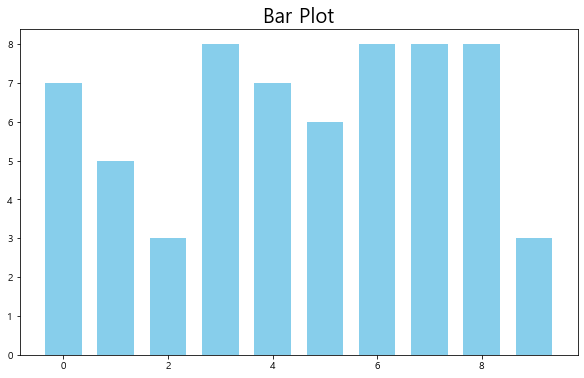

In [46]:
y = np.random.randint(2,10, size=10)
x = range(len(y)) #y갯수만큼 뽑기
plt.figure(figsize=(10,6))
plt.bar(x,y,width=0.7, color ='skyblue')
plt.title('Bar Plot', size=20)

- 수평막대

<AxesSubplot:>

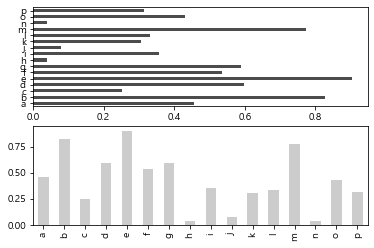

In [49]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index = list('abcdefghijklmnop'))

# 수직
data.plot.bar(ax=axes[1], color = 'k', alpha=0.2) #alpha 투명도
#수평
data.plot.barh(ax=axes[0], color = 'k', alpha=0.7)

,A,B,C,D
one,0.193254,0.046739,0.952644,0.858649
two,0.827903,0.963901,0.598936,0.930916
three,0.146769,0.113960,0.372029,0.766560
four,0.321142,0.638035,0.009221,0.543465
five,0.337755,0.898024,0.940707,0.384122


<AxesSubplot:>

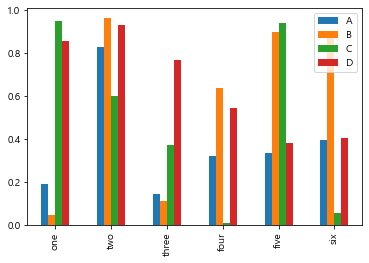

In [64]:
# 각 Row의 값을 묶어서 그룹별 막대그래프로 표현하기
df = pd.DataFrame(np.random.rand(6,4),
                  index = ['one','two','three','four','five','six'],
                  columns=['A','B','C','D'])

display(df.head())
df.plot.bar()

<AxesSubplot:>

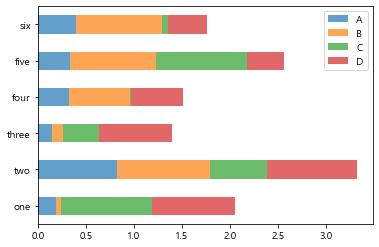

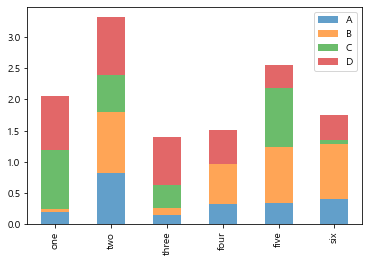

In [67]:
# 누적막대그래프 :stacked= True
df.plot.barh(stacked= True, alpha=0.7)
df.plot.bar(stacked= True, alpha=0.7)

## scatter plot : plt.scatter()

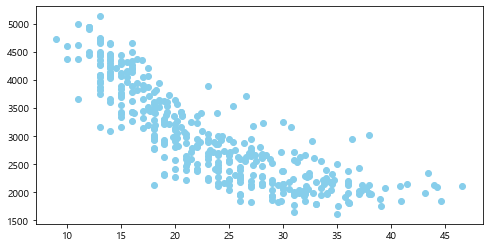

In [71]:
df_auto
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(8,4))
plt.scatter(x,y, color ='skyblue')

In [75]:
df_auto[['mpg','weight','displacement','cylinders']].corr() #높은 상관관계

,mpg,weight,displacement,cylinders
mpg,1.000000,-0.831741,-0.804203,-0.775396
weight,-0.831741,1.000000,0.932824,0.896017
displacement,-0.804203,0.932824,1.000000,0.950721
cylinders,-0.775396,0.896017,0.950721,1.000000


## histogram : plt.hist()

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

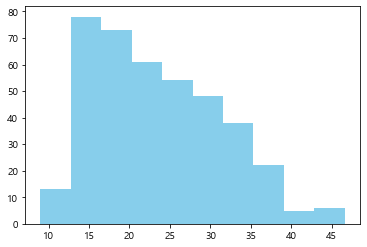

In [78]:
x = df_auto.mpg
plt.hist(x,bins=10, color='skyblue')

## box plot

<AxesSubplot:>

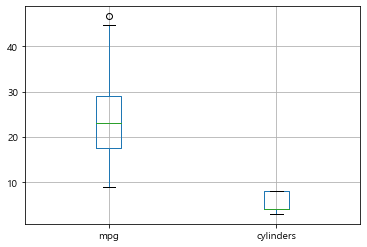

In [79]:
df_auto.boxplot(column=['mpg','cylinders'])

In [19]:
plt.boxplot(x='mpg', data=df_auto)

NameError: name 'df_auto' is not defined